In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import configparser

In [ ]:
config = configparser.ConfigParser()
config.read('config.cfg')

In [ ]:
db_name = "nyc_taxi_adv"
username = config.get('credentials', 'username')
password = config.get('credentials', 'password')

In [18]:
conn = psycopg2.connect(
        dbname=db_name,  
        user=username,       
        password=password,       
        host="127.0.0.1",      
        port="5432"
    )

conn.set_client_encoding('UTF8')
cur = conn.cursor()

C:\Users\valko\AppData\Local\Temp\ipykernel_9336\581516895.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


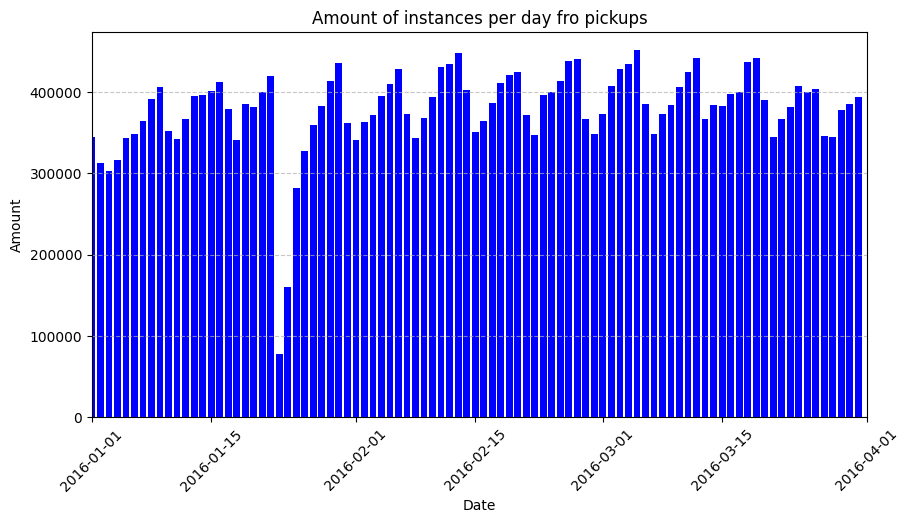

In [ ]:
query = """
    SELECT DATE(tpep_pickup_datetime) AS date, COUNT(*) AS frequency
    FROM taxi
    GROUP BY DATE(tpep_pickup_datetime)
    ORDER BY date;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 5))
plt.bar(df['date'], df['frequency'], color='blue')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Amount of instances per day for pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2016-04-01'))

plt.show()

C:\Users\valko\AppData\Local\Temp\ipykernel_9336\1591977695.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


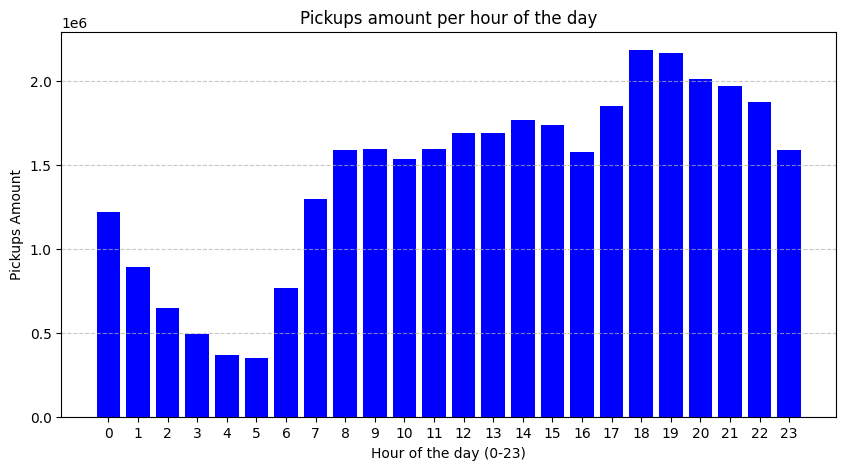

In [ ]:
query = """
    SELECT EXTRACT(HOUR FROM tpep_pickup_datetime) AS pickup_hour, COUNT(*) AS frequency
    FROM taxi
    GROUP BY pickup_hour
    ORDER BY pickup_hour;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 5))
plt.bar(df['pickup_hour'], df['frequency'], color='blue')

plt.xlabel('Hour of the day (0-23)')
plt.ylabel('Pickups Amount')
plt.title('Pickups amount per hour of the day')
plt.xticks(range(24)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

C:\Users\valko\AppData\Local\Temp\ipykernel_9336\355308209.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


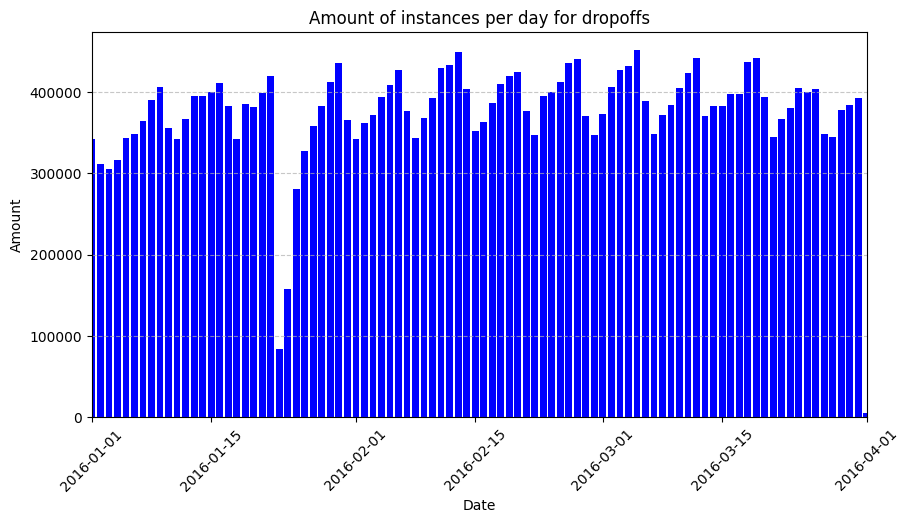

In [7]:
query = """
    SELECT DATE(tpep_dropoff_datetime) AS date, COUNT(*) AS frequency
    FROM taxi
    GROUP BY DATE(tpep_dropoff_datetime)
    ORDER BY date;
"""
df = pd.read_sql(query, conn)

# Graficar el histograma
plt.figure(figsize=(10, 5))
plt.bar(df['date'], df['frequency'], color='blue')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Amount of instances per day for dropoffs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2016-04-01'))

plt.show()

C:\Users\valko\AppData\Local\Temp\ipykernel_9336\1491295156.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


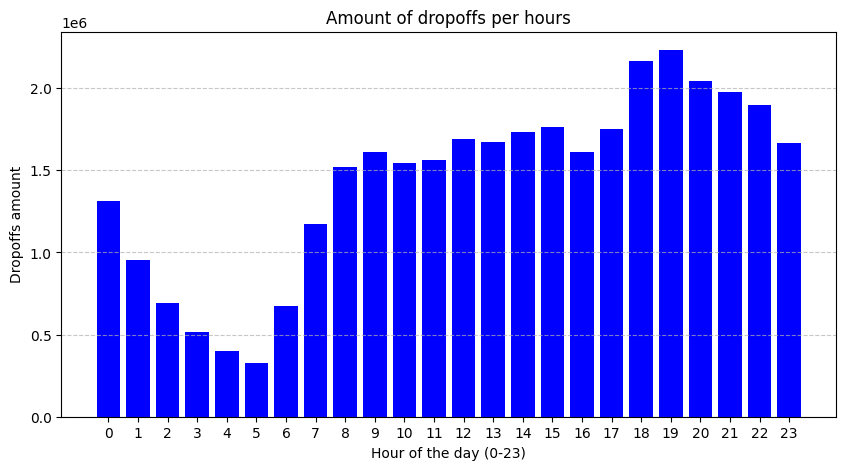

In [8]:
query = """
    SELECT EXTRACT(HOUR FROM tpep_dropoff_datetime) AS dropoff_hour, COUNT(*) AS frequency
    FROM taxi
    GROUP BY dropoff_hour
    ORDER BY dropoff_hour;
"""
df = pd.read_sql(query, conn)

# Crear histograma
plt.figure(figsize=(10, 5))
plt.bar(df['dropoff_hour'], df['frequency'], color='blue')

# Etiquetas y formato
plt.xlabel('Hour of the day (0-23)')
plt.ylabel('Dropoffs amount')
plt.title('Amount of dropoffs per hours')
plt.xticks(range(24))  # Asegura que haya ticks para cada hora
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
cur.execute("SELECT AVG(passenger_count) FROM taxi;") 
result = cur.fetchone()  

print(f"Mean passenger_count: {result[0]}\n")  
conn.commit()  

Mean passenger_count: 1.6616995159313550



C:\Users\valko\AppData\Local\Temp\ipykernel_9336\897745780.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


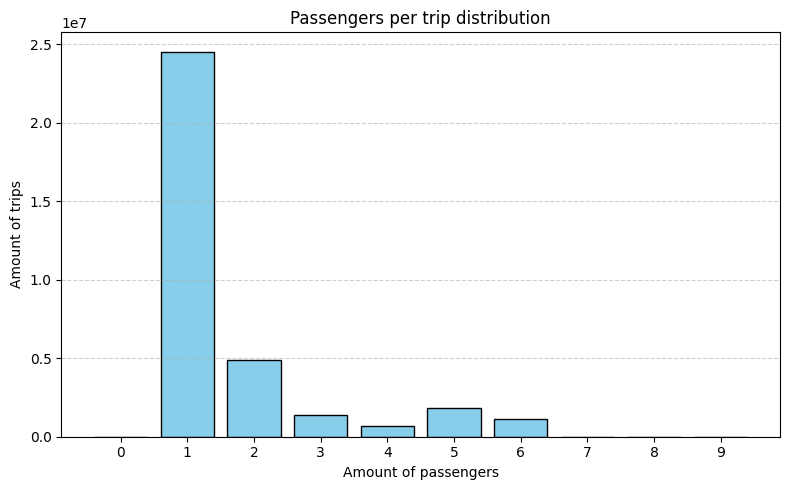

In [20]:
query = """
    SELECT passenger_count, COUNT(*) as frequency
    FROM taxi
    GROUP BY passenger_count
    ORDER BY passenger_count;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df = pd.read_sql(query, conn)

# Graficar el histograma
plt.figure(figsize=(8, 5))
plt.bar(df['passenger_count'], df['frequency'], color='skyblue', edgecolor='black')

plt.xlabel('Amount of passengers')
plt.ylabel('Amount of trips')
plt.title('Passengers per trip distribution')
plt.xticks(df['passenger_count'])  # Asegura que solo marque los valores existentes
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [10]:
cur.execute("SELECT AVG(trip_distance) FROM taxi;")  
result = cur.fetchone()  

print(f"Mean trip distance: {result[0]} miles\n")  
conn.commit()  

Mean trip distance: 5.309407807435238 miles



In [11]:
cur.execute("SELECT AVG(total_amount) FROM taxi;")  
result = cur.fetchone()  

print(f"Mean trip price: {result[0]}\n")  
conn.commit()

Mean trip price: 15.771750544204192



In [12]:
query = """
    SELECT tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, total_amount
    FROM taxi
    LIMIT 1000;
"""
df = pd.read_sql(query, conn)
correlation_matrix = df.corr()

C:\Users\valko\AppData\Local\Temp\ipykernel_9336\3993520059.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


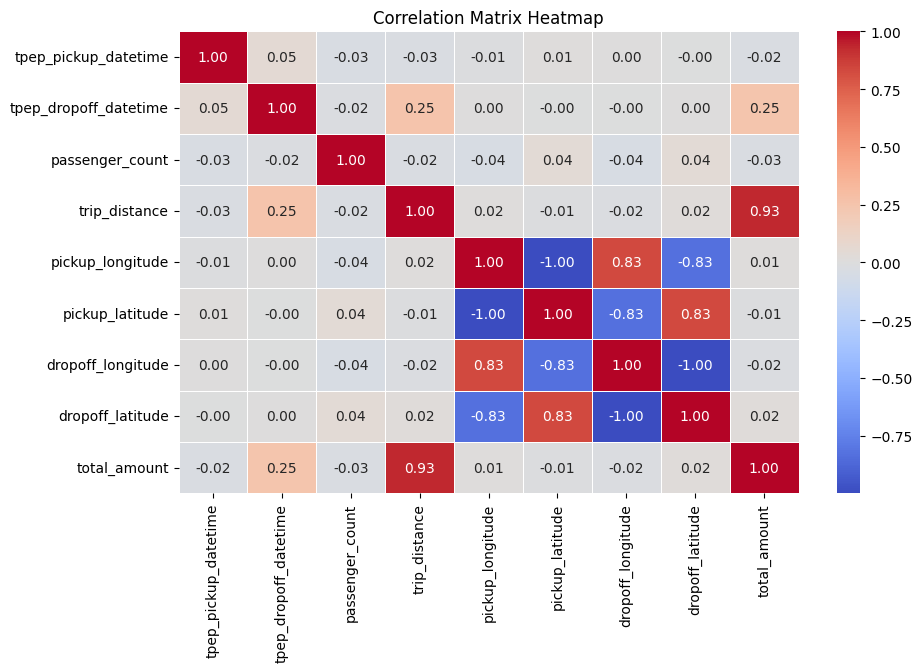

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:
cur.close()
conn.close()